# TRAPPIST Rebound Simulation

Run a simulation for 100 years with the sun and 7 planets of TRAPPIST, maybe saving snapshots every 0.1 year.

## Build the sim

In [1]:
import rebound
import numpy as np

In [2]:
sim = rebound.Simulation()
sim.integrator = "trace"
sim.dt = 0.0003
#sim.save_to_file('trappist.bin', interval=1e4,delete_file=True) # save as binary file

In [3]:
sol_mass = (2 * np.pi)**2 

jup_gm = 1.27E17 
jup_mass = (jup_gm / (1.33E20)) * sol_mass

star_mass = 0.0898 * sol_mass

b_mass = 0.004323 * jup_mass

c_mass = 0.004115 * jup_mass

d_mass = 0.00122 * jup_mass

e_mass = 0.00218 * jup_mass

f_mass = 0.003269 * jup_mass

g_mass = 0.004156 * jup_mass

h_mass = 0.00103 * jup_mass

# add particles to the simulation (8)

sim.add(m = star_mass, hash = 'TRAPPIST-1')
sim.add(m = b_mass, a = 0.01154, inc = (90 - 89.728) * (np.pi/180), hash = 'TRAPPIST-1b')
sim.add(m = c_mass, a = 0.01580, inc = (90 - 89.778) * (np.pi/180), hash = 'TRAPPIST-1c')
sim.add(m = d_mass, a = 0.02227, inc = (90 - 89.896) * (np.pi/180), hash = 'TRAPPIST-1d')
sim.add(m = e_mass, a = 0.02925, inc = (90 - 89.793) * (np.pi/180), hash = 'TRAPPIST-1e')
sim.add(m = f_mass, a = 0.03849, inc = (90 - 89.740) * (np.pi/180), hash = 'TRAPPIST-1f')
sim.add(m = g_mass, a = 0.04683, inc = (90 - 89.742) * (np.pi/180), hash = 'TRAPPIST-1g')
sim.add(m = h_mass, a = 0.06189, inc = (90 - 89.805) * (np.pi/180), hash = 'TRAPPIST-1h')

#### Define a function to save and load in outputs

#### Run it

In [4]:
Nout = 1000          # number of points to display
tmax = 100         # let the simulation run for 80 years
Nplanets = 7

x = np.zeros((Nplanets,Nout))
a = np.zeros((Nplanets,Nout))
ecc = np.zeros((Nplanets,Nout))
Omega = np.zeros((Nplanets,Nout))
omega = np.zeros((Nplanets,Nout))
inc = np.zeros((Nplanets, Nout))
f = np.zeros((Nplanets, Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    # note we use integrate() with the default exact_finish_time=1, which changes the timestep near 
    # the outputs to match the output times we want.  This is what we want for a Fourier spectrum, 
    # but technically breaks WHFast's symplectic nature.  Not a big deal here.
    os = sim.orbits()
    for j in range(Nplanets):
        x[j][i] = ps[j+1].x
        a[j][i] = os[j].a 
        ecc[j][i] = os[j].e
        Omega[j][i] = os[j].Omega
        omega[j][i] = os[j].omega
        inc[j][i] = os[j].inc
        f[j][i] = os[j].f

In [5]:
sim.status(showAllFields=False)

---------------------------------
REBOUND version:     	4.4.1
REBOUND built on:    	May  7 2024 19:50:41
Number of particles: 	8
Selected integrator: 	trace
Simulation time:     	1.0000000000000000e+02
Current timestep:    	0.000300
---------------------------------
<rebound.particle.Particle object at 0x1199e6950, m=3.545161900871298 x=7.657430896910422e-06 y=0.2680876112800566 z=0.0011110412923917568 vx=-0.0007681673585468484 vy=0.0029491255963609063 vz=1.3203480311338881e-05>
<rebound.particle.Particle object at 0x1199e7250, m=0.00016296601738016478 x=0.007796060931008615 y=0.2595766729382858 z=0.0010733218076536615 vx=12.935344838745232 vy=11.834911099506902 vz=0.04090261391487034>
<rebound.particle.Particle object at 0x1199e6950, m=0.0001551249506174828 x=-0.014755065477759434 y=0.26242236590720946 z=0.0010872440533563211 vx=5.376104527328346 vy=-13.96453719928511 vz=-0.05710118805035757>
<rebound.particle.Particle object at 0x1199e7250, m=4.599087235803864e-05 x=-0.01396616995466

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Inclination (rad)')

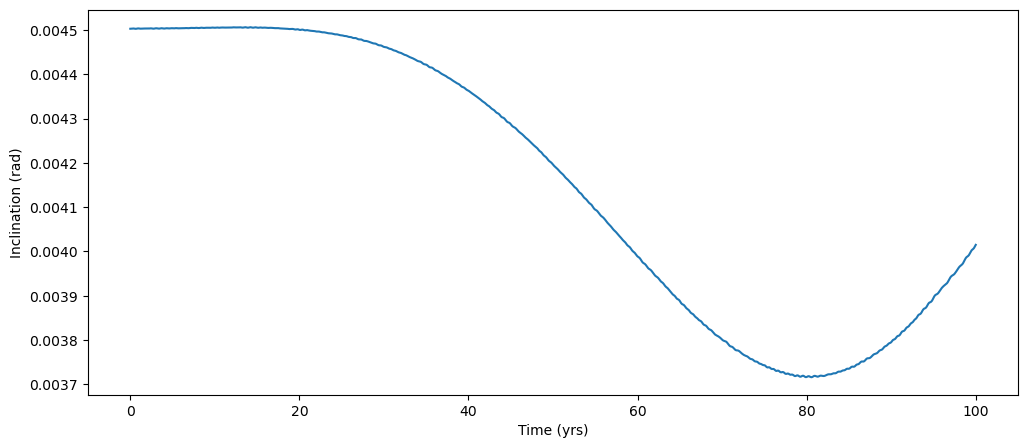

In [12]:
#labels = ['Jupiter', 'Eurybates', 'Polymele', 'Leucus', 'Orus', 'Patroclus']
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,inc[5])#,label=labels[0])
#plt.plot(times,ecc[1],label=labels[1])
#plt.plot(times,ecc[2],label=labels[2])
#plt.plot(times,ecc[3],label=labels[3])
#plt.plot(times,ecc[4],label=labels[4])
#plt.plot(times,ecc[5],label=labels[5])

ax.set_xlabel("Time (yrs)")
ax.set_ylabel("Inclination (rad)")
#plt.legend();
#plt.savefig('jup_troj_ecc.png')